<font size=6  color=#003366> [LGBIO2020] - Bioinstrumentation <br><br> 
Project EEG classification : Open your eyes!   </font> <br><br><br>

<font size=5  color=#003366>
Prof. M. Verleysen (supp. D. Mulders)<br>
Prof. A. Moureaux<br>
</font>
<br>
<br>

<font size=5 color=#009999> <b>GLOBAL CONTEXT </b> <br>
DEFINITION OF EEG CLASSIFICATION 
</font> <br> <br>

The aim of this project is to distinguish short segments of an EEG signal recorded in a subject whose eyes are either closed or open. In other words, you will train a binary classifier taking as input (features extracted from) a 500 ms EEG signal and for wich the prediction is the state of the subject (either eyes closed or open). To reach this goal, you will work on a real dataset recoded in the laboratory of Woluwe.</b> <br>

You will have to pre-process the obtained dataset, extract relevant features and finally tackle the classification task. Some guidelines are given along this notebook. <b> The comments/justifications that you will provide are crutial for this project! </b> <br>

In addition to this notebook, you are asked to  <b>write a report (pdf file - max. 5 pages, appendices are allowed) documenting all the choices that you have made regarding the processing steps. You should also present and comment your main results. </b> Do not hesitate to consult books or internet ressources. This is allowed to use them to answer the questions as long as you cite your references.


<br>

<img src="imgs/Context.png" width = "600">

The context of this project is illustrated in the figure above. First, you will be asked to extract segments of 500 ms out of the recorded EEG waves. During each segment, the state of the subject (eyes open or closed) must be constant. Based on these segments, you will extract some usefull features that will help to summarize the information content in those 500 ms signals. Then, you will train a classifier to predict whether a given new segment belongs to the "eyes open" or the "eyes closed" class. You will have to predict the performances you can obtain with this classification model.
<br><br>


<font size=5 color=#009999> <b> STRUCTURE OF THE PROJECT </b> <br>
WHAT ARE THE MAIN STEPS?
</font> <br> <br>

The project is divided into three parts : Data Precprocessing, Feature Generation and Classification. Those are illustrated in the figure below. 

   - In the first step, you will have to convert the entire recorded signal into segments that correspond either to the eyes closed or eyes open condition. During this phase, you will perfom basic signal processing operation to clean you data and make the classification easier. 
   - Then, based on the segments you have constructed, you will represent each of them by a collection of features. 
   - Finally, you will train some classification models on your features. You will have to estimate the performances obtained with the models.

<img src="imgs/blockdiagram.png" width = "800">


Note that those operations have been adressed during the three practical sessions. Do not hesitate to base this project on the code/observations you have already made during those sessions. 

<br> 


<font size=5 color=#009999> <b> INSTRUCTIONS </b> <br>
WORK BY GROUP AND DELIVERABLES
</font> <br> <br>

You can discuss about the project with other students, but your work has to be implemented either individually or in groups of two. You must submit on Moodle an archived folder containing:
   
   - Your notebook file with (at least) your codes and (eventually) small remarks. If it is necessary, you can join a README.txt file explaining how to run your codes. The results presented in your report should be reproducible with these codes. Make sure that we can compile them properly (for instance if you used a different toolbox than the ones provided on Moodle, you should include the associated files in your submission).
   - A pdf report of maximum 5 pages that presents your results and justifies your choices. You can write it in English or in French. This report is very important! Do not neglet the writing. It is recommended to illustrate and comment as much as possible your results (when it applies).
   
Don’t forget to mention the name(s) of the author(s) in the notebook and in the report.

<br><br>


<font size=6 color=#009999> <center><b>PART I - DATA PREPROCESSING </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>PROJECT DATA </b> <br>
HOW ARE THE DATA STORED?
</font> <br> <br>

The EEG signal on which we are working have been recorded in the Wolluwe's laboratory. This dataset includes 64 recording channels corresponding to the montage below:

<img src="imgs/Montage64.png" width = "500">

The sampling rate of these recordings is 1024Hz.<br><br>

You have 3 files at your disposal:
   - <samp>data_closed.csv</samp> contains the signals of dimension $ch \times t$, where $t$ is the number of recorded time steps and $ch$ is the number of electrodes. Those signals correspond to <b>eyes closed</b> condition. 
   - <samp>data_open.csv</samp> contains the signals of dimension $ch \times t$, where $t$ is the number of recorded time steps and $ch$ is the number of electrodes. Those signals correspond to <b>eyes open</b> condition. 
   -  <samp>ChannelNames.csv</samp> contains a $ch \times 1$ vector with the name of each electrode.
   
<div class="alert alert-info">
<b>[Question 1] Import the data and visualize them</b>  <br>
Import the signals stored in the <samp>*.csv</samp> files. As usually in a machine learning process, a simple data visualization step will help you to understand the nature of the task. You can use the <samp>ecg_plot</samp> provided in the TP1 or any other provided function. Of course, you can modify this code if you want. 
</div> 

<div class="alert alert-warning">
<b>[Remark] Do not display all your plots in the notebook </b>  <br>
Especially in the early stage of the project, you will produce a lot of graphs to validate what you are doing. Showing all of them in the notebook can be a nightmare. Instead, you can save them in 'png' files to look at them. This is done with the <samp>file_path</samp> argument of the visualization functions provided in previous practical sessions.
</div> 

In [9]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os




In [5]:
# Import dataset for eyes closed and save as a csv
channels = pd.read_csv('channel_names.csv', names = ["Ch_Names"]) # contains chx1 with name of each electrode
raw_eyes_closed_data = pd.read_csv('data_closed.csv', header = None)
new_ch_names = channels["Ch_Names"].to_list()

#Transpose the data 
raw_eyes_closed_data = raw_eyes_closed_data.T
raw_eyes_closed_data.rename(columns = dict(zip(raw_eyes_closed_data.columns, new_ch_names)), inplace = True)

sample_rate = 1024 #hz

#Create time vector from length of channels and sample rate
time = np.linspace(0, len(raw_eyes_closed_data)/sample_rate, len(raw_eyes_closed_data))

# Insert time vector as new column to the data
raw_eyes_closed_data.insert(0, 'Time', time)

#print the shapes of raw_eyes_closed_data and eyes_closed_df
print("Data loaded in from raw csv shape",raw_eyes_closed_data.shape) 
raw_eyes_closed_data.head()

Data loaded in from raw csv shape (123904, 65)


,Time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
0,0.000000,-16171.297852,-13054.397461,6332.378906,-8826.155273,-170.577805,2728.447998,-13529.490234,-7665.938965,8269.71875,...,4165.507812,-105.140434,7280.720703,-1071.794922,-9304.154297,4716.944336,-5071.662598,9423.966797,9992.87207,9160.061523
1,0.000977,-16171.235352,-13058.209961,6330.972656,-8826.405273,-172.359055,2728.072998,-13530.802734,-7670.845215,8272.46875,...,4166.257812,-104.452934,7274.814453,-1070.732422,-9303.873047,4718.038086,-5068.162598,9424.060547,9995.37207,9161.811523
2,0.001953,-16173.360352,-13064.334961,6324.316406,-8830.436523,-177.015305,2723.697998,-13538.865234,-7673.220215,8273.00000,...,4162.914062,-106.765427,7262.627441,-1072.138672,-9307.841797,4714.225586,-5069.537598,9421.623047,9994.80957,9163.061523
3,0.002930,-16173.235352,-13061.584961,6319.816406,-8831.155273,-176.046555,2724.635498,-13539.396484,-7670.501465,8270.62500,...,4161.789062,-108.046677,7249.533691,-1073.419922,-9311.716797,4710.131836,-5078.006348,9417.935547,9994.21582,9165.530273
4,0.003906,-16170.204102,-13053.522461,6323.003906,-8826.749023,-169.390320,2731.385498,-13532.333984,-7661.938965,8272.25000,...,4166.226562,-105.109184,7241.096191,-1069.732422,-9307.685547,4715.975586,-5076.818848,9422.935547,9998.37207,9174.499023


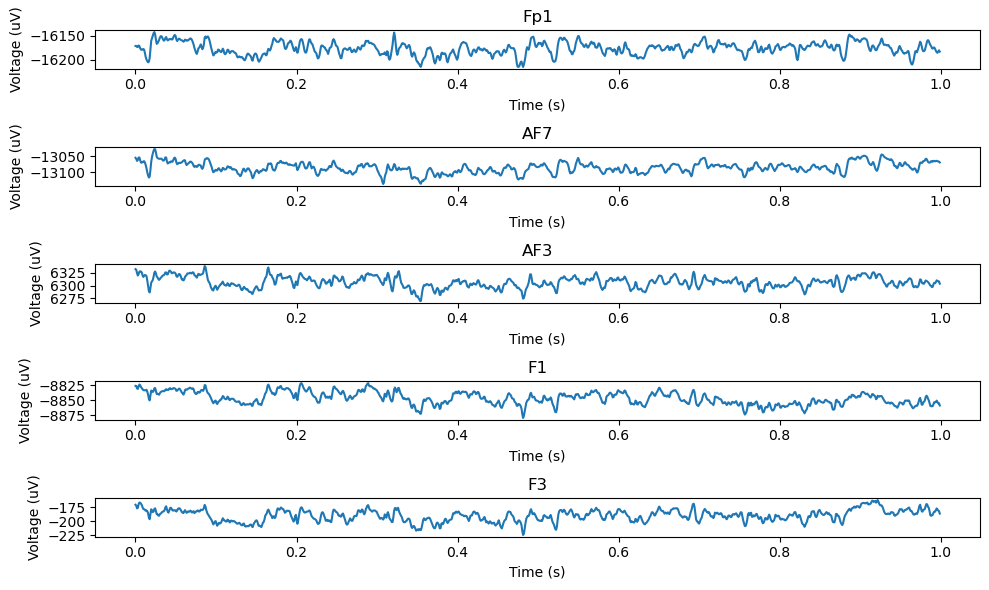

In [14]:
#Take out 5 channels to show on the plot
eeg_sample_closed_eyes = raw_eyes_closed_data[["Time", "Fp1", "AF7", "AF3", "F1", "F3"]]

# Limit the time to 10 seconds
eeg_sample_closed_eyes = eeg_sample_closed_eyes[eeg_sample_closed_eyes["Time"] < 1]

# Plot the 5 different channels data as subplots 
plt.figure(figsize=(10, 6))
plt.subplot(5, 1, 1)
plt.plot(eeg_sample_closed_eyes["Time"], eeg_sample_closed_eyes["Fp1"])
plt.title("Fp1")
plt.ylabel("Voltage (uV)")
plt.xlabel("Time (s)")
plt.subplot(5, 1, 2)
plt.plot(eeg_sample_closed_eyes["Time"], eeg_sample_closed_eyes["AF7"])
plt.title("AF7")
plt.ylabel("Voltage (uV)")
plt.xlabel("Time (s)")
plt.subplot(5, 1, 3)
plt.plot(eeg_sample_closed_eyes["Time"], eeg_sample_closed_eyes["AF3"])
plt.title("AF3")
plt.ylabel("Voltage (uV)")
plt.xlabel("Time (s)")
plt.subplot(5, 1, 4)
plt.plot(eeg_sample_closed_eyes["Time"], eeg_sample_closed_eyes["F1"])
plt.title("F1")
plt.ylabel("Voltage (uV)")
plt.xlabel("Time (s)")
plt.subplot(5, 1, 5)
plt.plot(eeg_sample_closed_eyes["Time"], eeg_sample_closed_eyes["F3"])
plt.title("F3")
plt.ylabel("Voltage (uV)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()




In [ ]:
#import dataset for eyes open
channels = pd.read_csv('channel_names.csv')
eyes_open = pd.read_csv('data_open.csv')

<font size=5 color=#009999> <b>PREPROCESSING </b> <br>
FILTER LOW FREQUENCY ARTEFACT AND POWER LINE NOISE
</font> <br> <br>

Before trying to classify the different EEG segments, you may consider some pre-processing steps aiming to remove as much as possible the undesirable components in your signals. For this part, visual inspection of your signals in the time and frequency domains can be very useful.


<div class="alert alert-info">
<b>[Question 2] Frequency filtering</b>  <br>
Implement one or multiple filter(s) to remove:
<ol> 
    <li> the noise induced by the power line (+/- 50 Hz)
    <li> the very low frequency artifact which induces high shift of amplitude. This artefact is represented below:
        <img src="imgs/basedrift.png" width = "700">
        
You can use the FIR filters as seen during the practical sessions or any other method. Justify briefly your filter design. 
</div> 

In [ ]:
# Insert your code here

<font size=5 color=#009999> <b> CONSTRUCT YOUR TRAINING SAMPLES </b> <br>
DIVIDE THE SIGNALS INTO SHORT SEGMENTS
</font> <br> <br>

One segment should correspond to a signal recorded either in eyes open or eyes closed condition. <br>

 
   
<div class="alert alert-info">
<b>[Question 3] Segment your data </b>  <br>
Segment the entire time signal into short segments of 500 ms. Each segment will constitue one training/validation/test sample of your final dataset. <br>
Is it interresting to consider overlapping segments, i.e. a first segments ranging between [1.5s,2s] and a second ranging between [1.75s,2.25s]? 
</div> 

In [ ]:
# Insert your code here

<br><br>

<font size=6 color=#009999> <center><b>PART II - FEATURE GENERATION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>CREATE YOUR OWN FEATURE SPACE </b> <br>
WHAT CAN BE CONSIDERED?
</font> <br> <br>

To be able to classify your EEG segments, you must define the features on which you will apply the classification algorithms. These features should somehow summarize as best as possible the ‘useful’ information contained in an EEG segment.<br>

A first option is to consider the power of the channels in different physiological frequency bands. In this case, you will have $n\_chan \times n\_freq$ features, where $n\_chan$ is the number of channels (here 64) and $n\_freq$ is the number of frequency bands considered. Does such features make sense in this project?
   
<b>Feel free to consider different features as well. Do not forget to give and comment their definition in the report.</b>

<div class="alert alert-warning">
<b>Power of a frequency band </b>  <br>
We provide you the <samp>getBandPower</samp> function which should help you to compute the power of several frequency bands (defined randomly). Do not hesitate to rely on this function to get your feature space.
</div> 

<div class="alert alert-info">
<b>[Question 4] Create your feature space </b>  <br>
Explain your methodology to create relevant features out of the segments you have obtained before. You may consider the the power of a relevant subset of the channels in different physiological frequency bands. <br>
Can you provide example of other relevant features? 
</div> 

In [ ]:
# Insert your code here

# -------------------------------------------------------------------------------------
# Provide the PSD of a signal for several frequency bands 
# Inspired from the tutorial : https://raphaelvallat.com/bandpower.html
# Inputs : 
#   - signal : a 1-D signal 
#   - fs : sampling frequency of the signal
# Outputs: 
#   - PSD : a list of the PSD evaluated in the specified frequency bands
#   - rangeName : a list describing the frequency bands
# -------------------------------------------------------------------------------------
def getBandPower(signal, fs): 
    freqs, psd  = welch(signal, fs, nfft = 8192)
    freq_res    = freqs[1] - freqs[0]
    total_power = simps(psd, dx=freq_res)
    
    freqRanges = [[6,8.5], [10,15], [30,100]] # Adapt those values...
    rangeName  = ['band1', 'band2', 'band3']  # and name them!
    PSD        = []
    for thisRange in freqRanges: 
        low, high = thisRange[0], thisRange[1]
        idx       = np.logical_and(freqs >= low, freqs <= high) 
        PSD.append(simps(psd[idx], dx=freq_res) / total_power)
    return PSD, rangeName

<font size=5 color=#009999> <b>DIMENSIONALITY REDUCTION </b> <br>
FEATURE EXTRACTION OR FEATURE SELECTION
</font> <br> <br>

<div class="alert alert-info">
<b>[Question 5] Reduce the number of features </b>  <br>
Implement either a feature selection or a feature extraction technique to reduce the number of features in you dataset.
</div> 

In [ ]:
# Insert your code here

<br><br>

<font size=6 color=#009999> <center><b>PART III - CLASSIFICATION </b></center> </font> <br> <br>

<font size=5 color=#009999> <b>MODEL AND HYPERPARAMETERS SELECTION </b> <br>
K-FOLD
</font> <br> <br>

In order to assess whether the features defined above allow to discriminate between the two conditions (eyes closed or open), you will use classification algorithms. For this task, you are advised to follow the instructions given for the third practical session. In particular, you should consider using a K-Fold cross validation to evaluate your classifiers.
You are asked to use at least two classifiers among the following ones:
   - K-nearest neighbors (kNN)
   - Decision tree
   - Neural network
   - SVM
   
<div class="alert alert-info">
<b>[Question 6] Choose your classifier </b>  <br>
Report the performances obtained with your classifiers (in terms of accuracy) and give some comments. What is a model hyperparameter? How to set the value of an hyperparameter? <br>
You can compare the classification accuracies obtained using different feature sets. For instance, do you obtain better results if you perform a dimensionality reduction (e.g. using PCA) before? (Or if you only use a subset of your features?)
</div> 

In [ ]:
# Insert your code here

<font size=5 color=#009999> <b>EVALUATE YOUR BEST MODEL ON THE TEST SET </b> <br>
WHAT ARE YOUR CONCLUSIONS?
</font> <br> <br>

   
<div class="alert alert-info">
<b>[Question 7] Performance on the test set </b>  <br>
Now that you have selected the best model (and its best hyperparameters), evaluate its performance on the test set. Comment.
</div> 

In [ ]:
# Insert your code here